In [1]:
# Script to graph the number of NODES for ranked enumeration
## first scenario

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [10]:
alg_label = [
             "Intersection with the minimum", 
             "Density"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [7]:
# box plots for each query
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[]]
for i,type_fun in enumerate([0]):#,1]):


    leaves = pd.read_csv(f'../../partial/dfuds/backtracking/results-f0-time.csv', delimiter=';')
    density = pd.read_csv(f'../../partial/dfuds/backtracking/results-f1-time.csv', delimiter=';')
    
    datasets[i] = [leaves,
                   density]
    
 #   print(i)
    for j,query in enumerate(queries_label):
        data[j] = [leaves[query],
                         density[query]] 

In [11]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['orange','lime', 'peru','lightsalmon', 'gold']


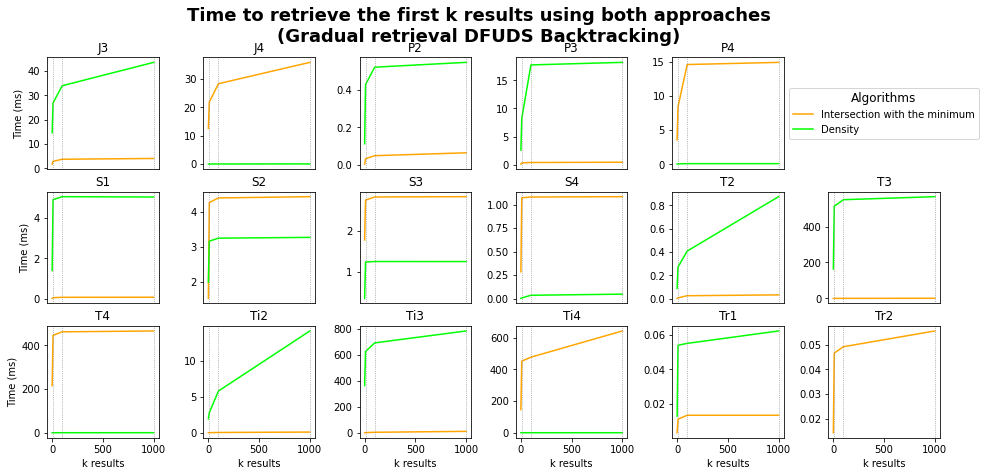

In [14]:
# Crear la figura
fig = plt.figure(figsize=(16, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Time (ms)')
s1.set_ylabel('Time (ms)')
t4.set_ylabel('Time (ms)')

t4.set_xlabel('k results')
ti2.set_xlabel('k results')
ti3.set_xlabel('k results')
tr1.set_xlabel('k results')
tr2.set_xlabel('k results')
ti4.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    #if(query != j3 and query != s1 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Time to retrieve the first k results using both approaches\n(Gradual retrieval DFUDS Backtracking)', fontsize=18, fontweight='bold')

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/both_approaches_variablek-time.pdf')

plt.show()
 

In [8]:
## second scenario: only plot queries with results > 1000

In [11]:

alg_label = ["Original",
            "Grad. LOUDS Backtrack.", 
             "Grad. LOUDS Op. Order",
             "Grad. DFUDS Backtrack.", 
             "Grad. DFUDS Op. Order",]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [12]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k

# Define the values of k to include
desired_k_values = [1, 10, 100, 1000]


j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-v1000-time.csv"
    #print(file)
    
    original = pd.read_csv(f'../../query1000results/original/results-v1000-time.csv',delimiter=';')
    original = original.head(4)
    
    # Drop columns where all values are zero
    original = original.loc[:, (original != 0).any(axis=0)]
    
    partialLoudsBack = pd.read_csv(f'../../query1000results/partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsBack = partialLoudsBack.loc[:, (partialLoudsBack != 0).any(axis=0)]
    
    partialLoudsNon = pd.read_csv(f'../../query1000results/partial/louds/optimalOrder/{file}', delimiter=';')
    partialLoudsNon = partialLoudsNon.loc[:, (partialLoudsNon != 0).any(axis=0)]
    
    partialDfudsBack = pd.read_csv(f'../../query1000results/partial/dfuds/backtracking/{file}', delimiter=';')
    partialDfudsBack = partialDfudsBack.loc[:, (partialDfudsBack != 0).any(axis=0)]
    
    partialDfudsNon = pd.read_csv(f'../../query1000results/partial/dfuds/optimalOrder/{file}', delimiter=';')
    partialDfudsNon = partialDfudsNon.loc[:, (partialDfudsNon != 0).any(axis=0)]
    
    
    datasets_v1000[i] = [original,
                            partialLoudsBack, 
                           partialLoudsNon, 
                           partialDfudsBack, 
                           partialDfudsNon]

 #   print(i)
    for j,query in enumerate(queries_label_v1000):
        data_v1000[j] = [original[query],
                         partialLoudsBack[query], 
                         partialLoudsNon[query], 
                         partialDfudsBack[query], 
                         partialDfudsNon[query]]
        

In [13]:
datasets_v1000[0][0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.002737,0.002067,0.000153,0.003508,0.043525,NaN,NaN,0.000105,NaN,0.000207,0.000125,0.000135,0.000502,0.512158,13.5426,NaN,NaN
1,10,0.003034,0.002471,0.000258,0.006122,2.190950,NaN,NaN,0.000124,NaN,0.000399,0.000231,0.000580,0.000706,0.546287,13.5623,NaN,NaN
2,100,0.010032,0.029507,0.001173,0.010042,2.217500,NaN,NaN,0.000303,NaN,0.007229,0.027564,0.001301,0.002365,2.045490,26.9417,NaN,NaN
3,1000,0.075530,0.102740,0.007050,0.018471,2.189590,NaN,NaN,0.002036,NaN,0.013604,1.876350,0.023582,0.029240,2.965270,155.0110,NaN,NaN


In [14]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'hotpink','peru','lightsalmon', 'gold']


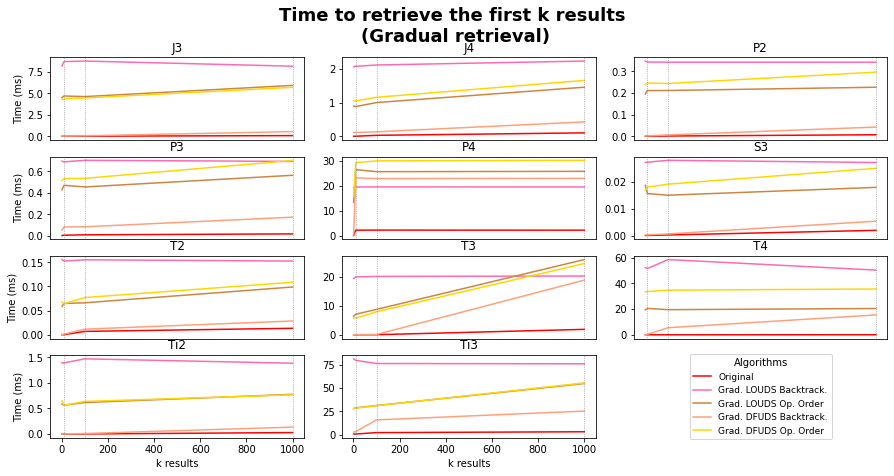

In [21]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.2, wspace=0.15)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (ms)')
p3.set_ylabel('Time (ms)')
t2.set_ylabel('Time (ms)')
ti2.set_ylabel('Time (ms)')

ti2.set_xlabel('k results')
ti3.set_xlabel('k results')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0][0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    #if(query != j3 and query != p2 and query != s3 and query != ti3 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != ti2 and query != ti3):
        query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results \n(Gradual retrieval)', fontsize=18, fontweight='bold')


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/gradual_variablek-v1000-time.pdf')

plt.show()
 